In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

# import nltk and download required dictionaries
import nltk
nltk.download("wordnet")
nltk.download("stopwords")

# load in ace dataset with text
filepath = '/Users/samrelins/Documents/LIDA/ace_project/data/ace_data_extra.csv'
ace_dat = pd.read_csv(filepath)
ace_dat.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samrelins/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samrelins/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,hospital_required,referral_from,referral_profession,age,address,ethnicity,gender,allergies,referral_date,referral_time,...,gut_feeling,ox_sat,resp_rate,heart_rate,temp,sepsis,safeguarding,medical_history,examination_summary,recommendation
0,N,CCDA,Consultant,8,BD07,Indian,F,NKA,Winter,Morning,...,low concern,97,20,118,36.5,None noted,N,3 day history of cough and wheeze. Known asthm...,"Looks well, running around talking in sentence...",Inhaler administered 10:30 – 10 puffs via spac...
1,N,A&E,Doctor,11,BD03,Pakistani,F,NKA,Winter,Morning,...,low concern,96,20,109,37,None noted,N,"Known asthmatic, has a viral illnees since yes...","Much improved since admission to A&E, now mana...","Commenced on prednisolone, is on seretide and ..."
2,N,CCDA,Doctor,3,BD04,Slovak,F,NKDA,Winter,Afternoon,...,well,96,28,140,37,None noted,N,Previously fit and well\nFamily history of ast...,No recession or signs of increased work of bre...,10 puffs 4 hourly\nHad first dose of prednisol...
3,N,GP,Doctor,3,BD06,British,M,NKDA,Winter,Afternoon,...,low concern,98,28,104,36.8,None noted,N,Rash noted to abdomen\nNo other medical history\n,Child is wheezy but is well with it. His obser...,The GP will prescribe salbutamol inhaler (he h...
4,N,GP,Doctor,3,BD09,Pakistani,M,NKA,Winter,Afternoon,...,well,97,None,None,37,None noted,N,"had an admission to LGI one year ago, gp unsur...",No wheeze at the moment but would like him to ...,"4 hourly inhaler 6 puffs, also commenced brown..."


In [3]:
stopwords = set(nltk.corpus.stopwords.words("english"))

# helper function to plot word clouds
def show_wordcloud(text):
    wordcloud = WordCloud(width=800,
                          height=400,
                          stopwords = stopwords).generate(text)
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

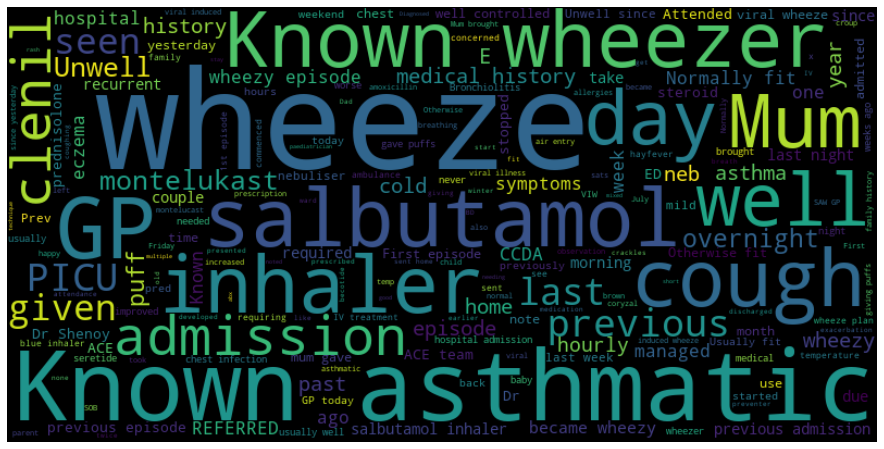

In [4]:
# join all medical histories together in one big string (required input
# format for WordCloud object)
history_string = " ".join(ace_dat.medical_history.dropna().values)
# plot word cloud
show_wordcloud(history_string)

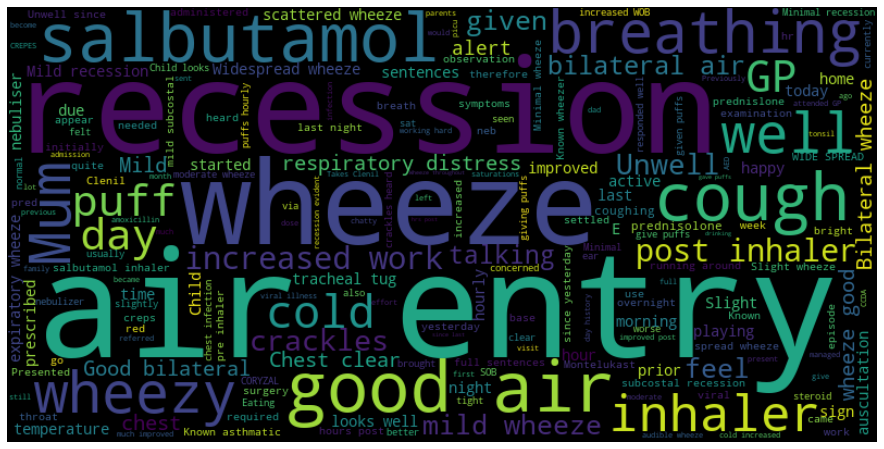

In [5]:
examination_string = " ".join(ace_dat.examination_summary.dropna().values)
show_wordcloud(examination_string)

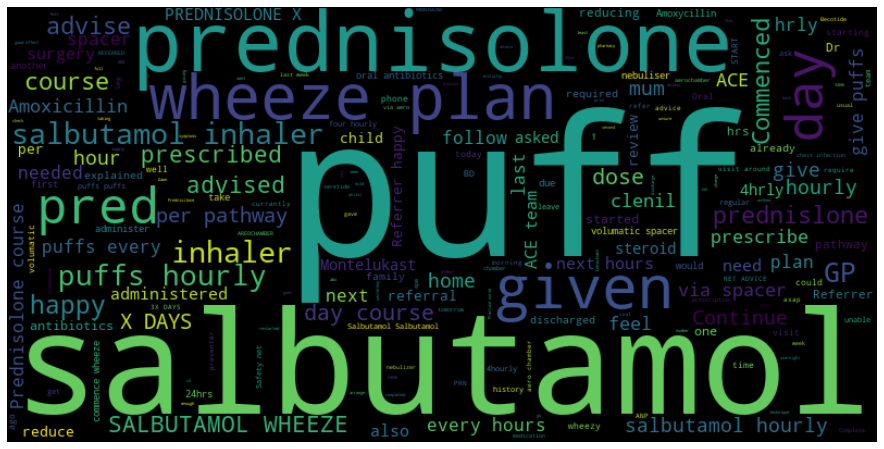

In [6]:
recommendation_string = " ".join(ace_dat.recommendation.dropna().values)
show_wordcloud(recommendation_string)

In [7]:
# load lemmatizer and print example of lemmatized text
lemmatizer = nltk.WordNetLemmatizer()
for word in ["ate", "sat", "was", "has", "transcribed"]:
    print(f"{word} -> {lemmatizer.lemmatize(word, pos = 'v')}")

ate -> eat
sat -> sit
was -> be
has -> have
transcribed -> transcribe


In [8]:
# load stemmer and print example of stemmed text
stemmer = nltk.SnowballStemmer("english")
for word in ["thinking", "described", "denied", "preparation", "thoroughness"]:
    print(f"{word} -> {stemmer.stem(word)}")

thinking -> think
described -> describ
denied -> deni
preparation -> prepar
thoroughness -> thorough


In [46]:
# load tokenizer - not terribly exciting so no example required
tokenizer = nltk.tokenize.RegexpTokenizer(r"(\d+|[a-zA-Z]+)")

# helper function to preprocess text using tokenizer / lemmatizer / stemmer
def preprocess_text(text):
    tokens = []
    for token in tokenizer.tokenize(text):
        if token not in stopwords:
            if "wheez" in token:
                stem_lem_token = "wheez"
            else:
                lem_token = lemmatizer.lemmatize(token, pos = 'v')
                stem_lem_token = stemmer.stem(lem_token)
            tokens.append(stem_lem_token)
    return " ".join(tokens)

In [47]:
# example of effect of text preprocessing
eg_sentence = "this is an example to show what preprocessed notes will look " \
              "like"
print(80 * "=", flush=True)
print("The following sentence:\n", flush=True)
print("\t" + eg_sentence, flush=True)
print("\nis processed by 'custom_preprocessor' to:\n", flush=True)
print("\t" + preprocess_text(eg_sentence), flush=True)
print(80 * "=")

The following sentence:

	this is an example to show what preprocessed notes will look like

is processed by 'custom_preprocessor' to:

	exampl show preprocess note look like


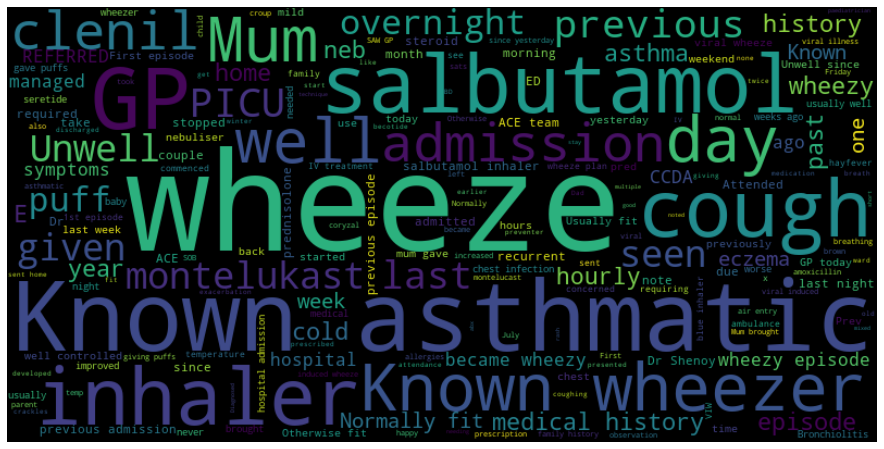

In [48]:
# comparison of original word cloud and word cloud using preprocessed text
history_string = " ".join(ace_dat.medical_history.dropna().values)
show_wordcloud(history_string)

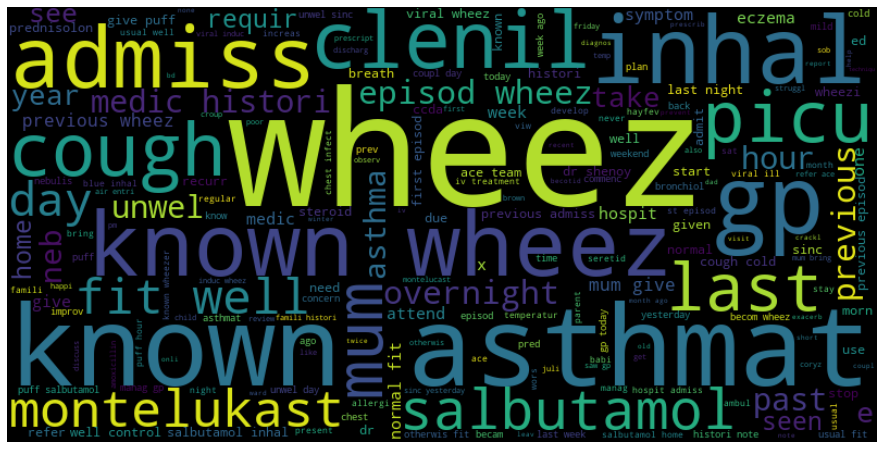

In [49]:
history_string_proc = " ".join(
    [preprocess_text(notes)
     for notes in ace_dat.medical_history.dropna().values]
)
show_wordcloud(history_string_proc)

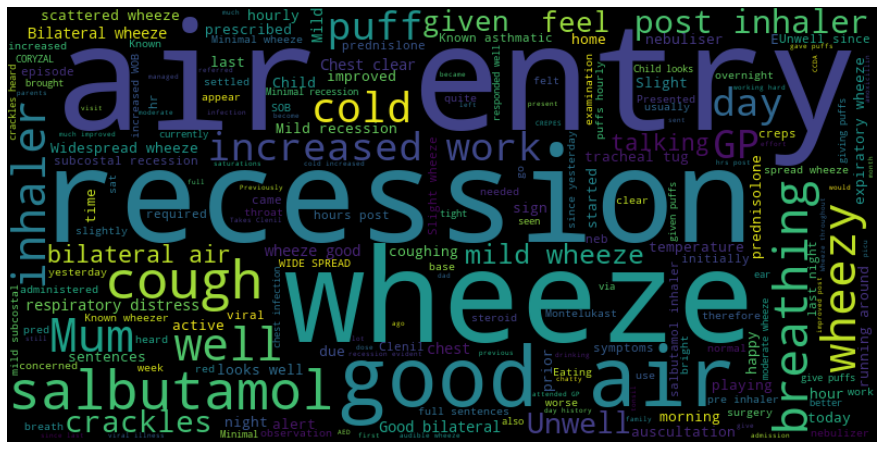

In [50]:
examination_string = " ".join(ace_dat.examination_summary.dropna().values)
show_wordcloud(examination_string)

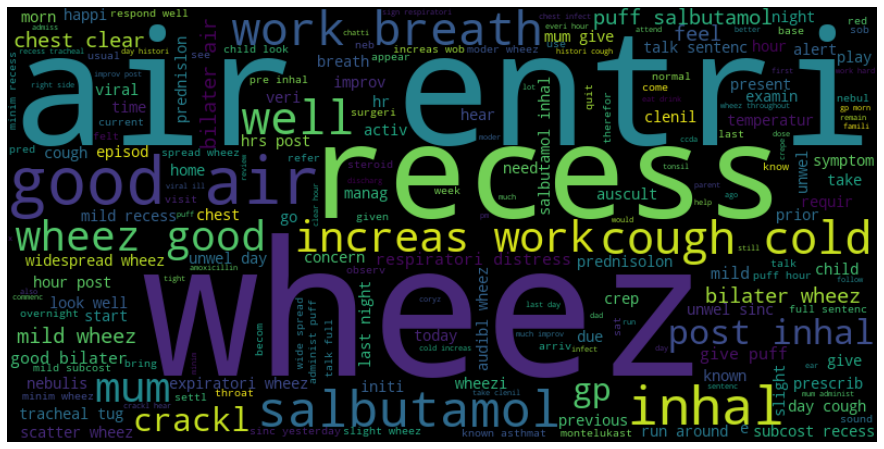

In [51]:
examination_string_proc = " ".join(
    [preprocess_text(notes)
     for notes in ace_dat.examination_summary.dropna().values]
)
show_wordcloud(examination_string_proc)

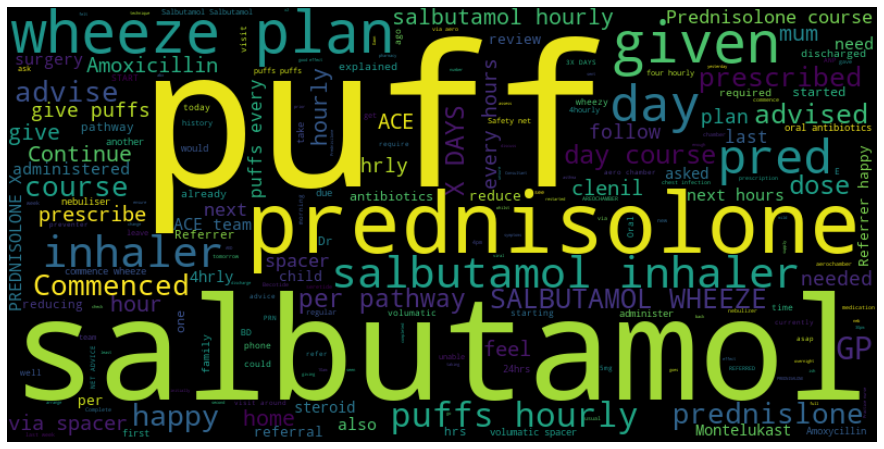

In [52]:
recommendation_string = " ".join(ace_dat.recommendation.dropna().values)
show_wordcloud(recommendation_string)

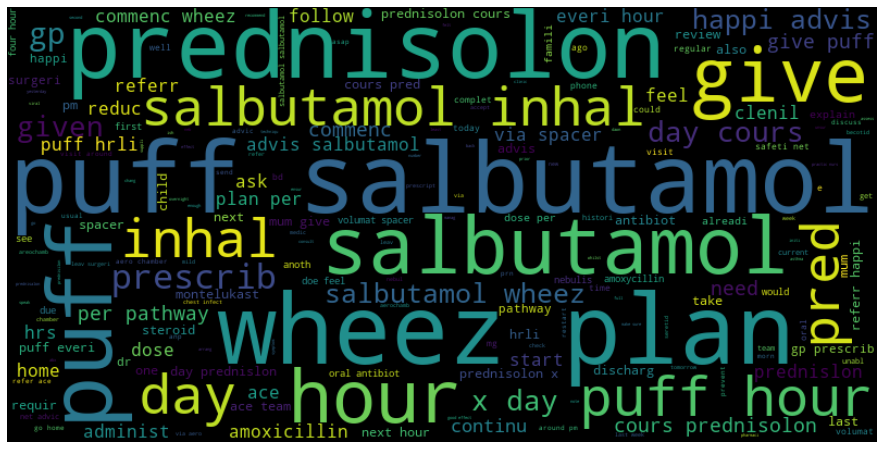

In [53]:
recommendation_string_proc = " ".join(
    [preprocess_text(notes)
     for notes in ace_dat.recommendation.dropna().values]
)
show_wordcloud(recommendation_string_proc)

In [55]:
[word for word in rec_count_vect.vocabulary_.keys() if "puff" in word and len
(word.split()) == 1]

['puff', 'pufff']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(preprocessor=preprocess_text,
                             ngram_range=(1,2))

eg_sentences = [
    "these are some example sentences",
    "check out this example sentence",
    "this is another eg sentence of words",
    "this set of words is exemplary of a sentence"
]

for sentence in eg_sentences:
    print(sentence + " -> " + preprocess_text(sentence))

eg_counts = count_vect.fit_transform(eg_sentences)
eg_counts.toarray()

these are some example sentences -> exampl sentenc
check out this example sentence -> check exampl sentenc
this is another eg sentence of words -> anoth eg sentenc word
this set of words is exemplary of a sentence -> set word exemplari sentenc


array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]])

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
eg_tfidf_values = tfidf_transformer.fit_transform(eg_counts)
eg_tfidf_values.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.64043405, 0.64043405, 0.        , 0.        ,
        0.42389674, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.53334252, 0.53334252, 0.        ,
        0.        , 0.42049337, 0.42049337, 0.        , 0.        ,
        0.27832025, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.41190608, 0.41190608, 0.        , 0.        , 0.41190608,
        0.41190608, 0.        , 0.        , 0.        , 0.        ,
        0.21494968, 0.41190608, 0.        , 0.        , 0.32475149,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41190608, 0.41190608,
        0.21494968, 0.        , 0.41190608, 0.41190608, 0.32475149,
        0.41190608]])

In [ ]:
# load sklearn count vectorizer which counts tokens in each text field entry
rec_count_vect = CountVectorizer(preprocessor=preprocess_text,
                             ngram_range=(1,2))
rec_count_vect.fit_transform(
    ace_dat.recommendation.dropna().values
)


from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tfidfs, train_data[:,2])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

study_type_clf = Pipeline(
    [('vec', CountVectorizer(preprocessor=custom_preprocessor)),
     ('tfidf', TfidfTransformer()),
     ('clf', SVC())
])

study_type_clf.fit(train_data[:,1], train_data[:,2])
